In [1]:
import mne

import numpy as np

In [2]:

raw = mne.io.read_raw_eeglab('/Users/elizavetabeltyukova/Desktop/UCSD/bipn162/SleepDeprivationEEG/sub-01/ses-2/eeg/sub-01_ses-2_task-eyesclosed_eeg.set', 
preload=True)

Reading /Users/elizavetabeltyukova/Desktop/UCSD/bipn162/SleepDeprivationEEG/sub-01/ses-2/eeg/sub-01_ses-2_task-eyesclosed_eeg.fdt
Reading 0 ... 149999  =      0.000 ...   299.998 secs...


In [3]:
eeg_data = raw.get_data()

Using matplotlib as 2D backend.


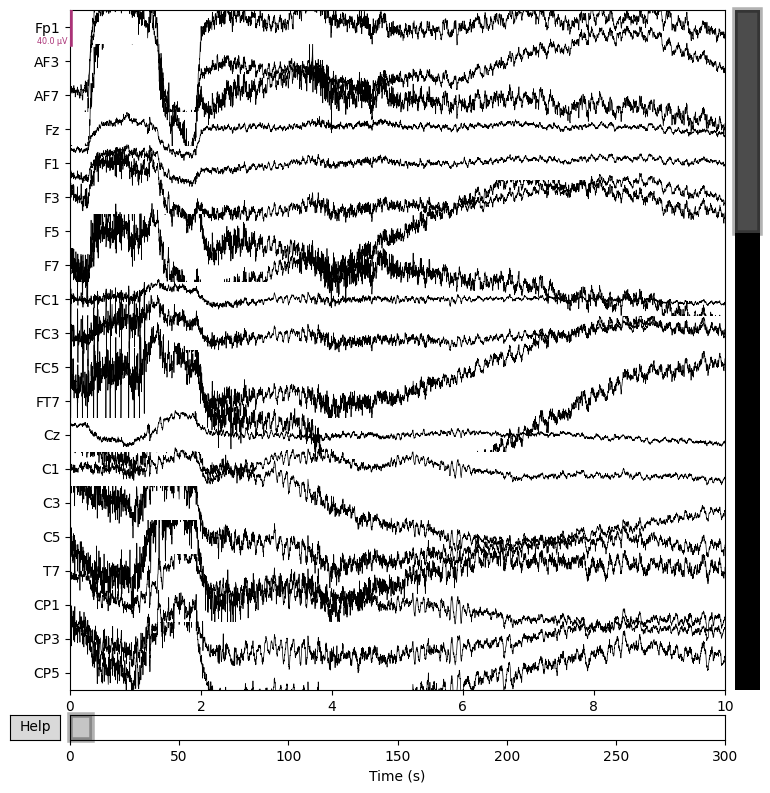

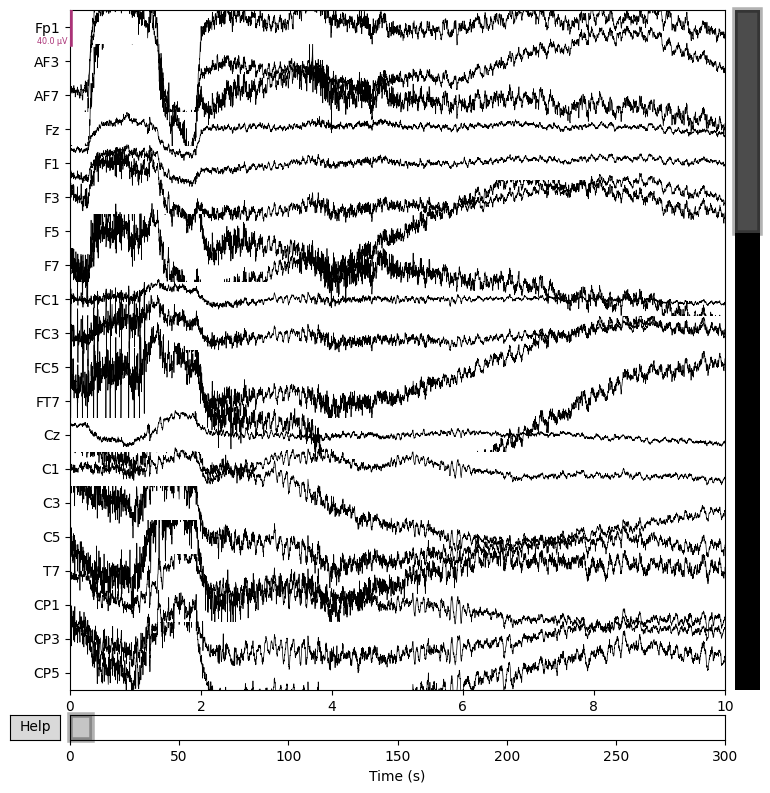

In [4]:
raw.plot()  # Plot raw

In [5]:
raw_normal = mne.io.read_raw_eeglab('/Users/elizavetabeltyukova/Desktop/UCSD/bipn162/SleepDeprivationEEG/sub-01/ses-1/eeg/sub-01_ses-1_task-eyesclosed_eeg.set', preload=True)

Reading /Users/elizavetabeltyukova/Desktop/UCSD/bipn162/SleepDeprivationEEG/sub-01/ses-1/eeg/sub-01_ses-1_task-eyesclosed_eeg.fdt
Reading 0 ... 149999  =      0.000 ...   299.998 secs...


In [6]:
norm_eeg_data = raw_normal.get_data()

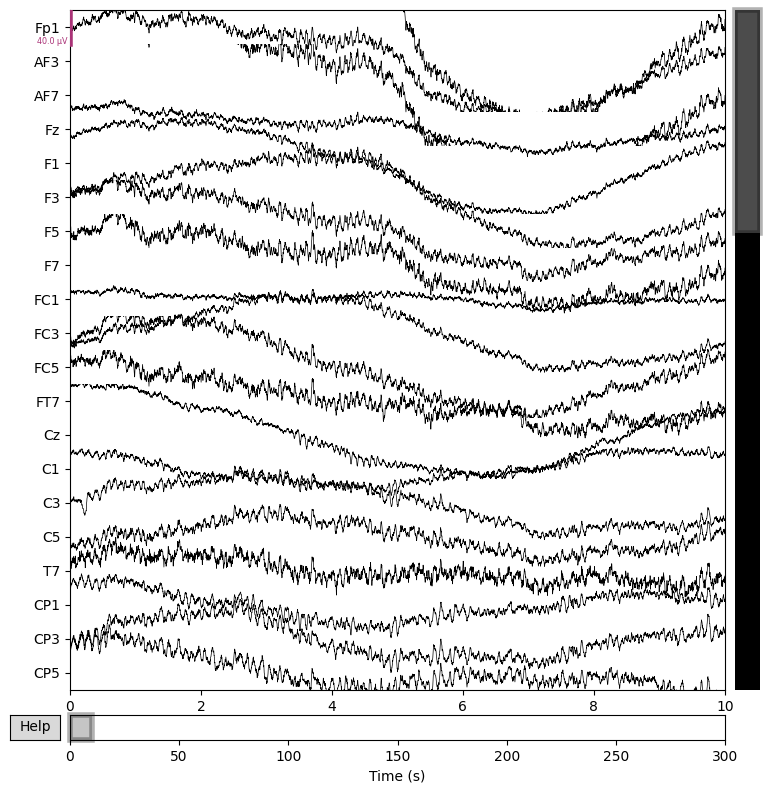

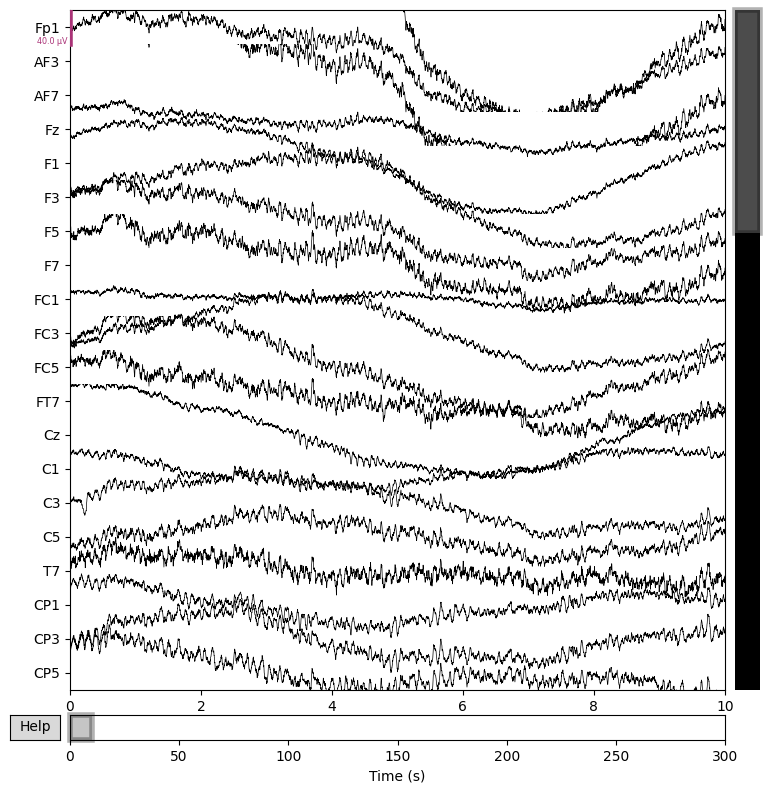

In [7]:
raw_normal.plot()

In [11]:
montage = raw.get_montage()

if montage is None:
    print("No montage is set for this data.")
else:
    # Access positions of channels and fiducials
    positions = montage.get_positions()
    print("Channel positions:", positions['ch_pos'])  # Channel positions
    print("Fiducials:", positions['nasion'], positions['lpa'], positions['rpa'])  # Fiducial points

Channel positions: OrderedDict([('Fp1', array([-0.0309026 ,  0.11458518,  0.02786657])), ('AF3', array([-0.03518601,  0.10912957,  0.05643921])), ('AF7', array([-0.05636067,  0.09915152,  0.02514129])), ('Fz', array([-0.00122928,  0.09327445,  0.10263929])), ('F1', array([-0.02904395,  0.09144848,  0.09661865])), ('F3', array([-0.05180905,  0.0866879 ,  0.07871409])), ('F5', array([-0.06605409,  0.08023978,  0.05377108])), ('F7', array([-0.07187663,  0.07310353,  0.02579046])), ('FC1', array([-0.03571587,  0.06171406,  0.11798302])), ('FC3', array([-0.06185234,  0.05713329,  0.09376583])), ('FC5', array([-0.07890598,  0.05136739,  0.06296235])), ('FT7', array([-0.08248932,  0.04484874,  0.02768058])), ('Cz', array([-0.00137414,  0.02761709,  0.14019949])), ('C1', array([-0.03793783,  0.02633745,  0.12977061])), ('C3', array([-0.06714873,  0.02335823,  0.10451068])), ('C5', array([-0.08208531,  0.01929363,  0.06948967])), ('T7', array([-0.08598209,  0.01487164,  0.03117337])), ('CP1', a

In [10]:
from mne.channels import make_standard_montage

montage = make_standard_montage('standard_1020')
raw.set_montage(montage, match_case=False)  # Ensure channel names match

<RawEEGLAB | sub-01_ses-2_task-eyesclosed_eeg.fdt, 61 x 150000 (300.0 s), ~69.9 MB, data loaded>

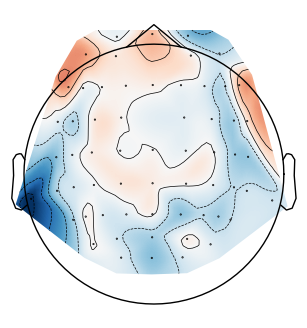

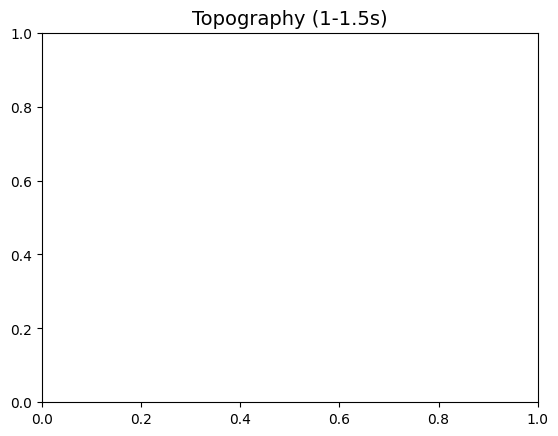

In [16]:
import mne
import matplotlib.pyplot as plt

# Select a time window (e.g., 0.3-0.5 seconds post-stimulus)
tmin, tmax = 1, 1.5
data = raw.copy().crop(tmin, tmax).get_data(picks='eeg').mean(axis=1)

# Plot the topography
fig, ax = plt.subplots(figsize=(8, 4))
mne.viz.plot_topomap(
    data, 
    raw.info, 
    ch_type='eeg', 
    axes=ax,
    show=True,
    outlines='head',  # Adds head outline
    sensors=True,     # Shows electrode positions
    contours=6,       # Number of contour lines
    extrapolate='local'  # Smooth interpolation
)

plt.title(f'Topography ({tmin}-{tmax}s)', fontsize=14)
plt.show()


In [18]:
# Re-reference to average (common for EEG analysis)
raw.set_eeg_reference('average')

# Optional: Apply bandpass filter (e.g., 1-40 Hz)
raw.filter(0.2, 45, fir_design='firwin')

EEG channel type selected for re-referencing
Applying average reference.
Applying a custom ('EEG',) reference.
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 0.2 - 45 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 0.20
- Lower transition bandwidth: 0.20 Hz (-6 dB cutoff frequency: 0.10 Hz)
- Upper passband edge: 45.00 Hz
- Upper transition bandwidth: 11.25 Hz (-6 dB cutoff frequency: 50.62 Hz)
- Filter length: 8251 samples (16.502 s)



[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s


<RawEEGLAB | sub-01_ses-2_task-eyesclosed_eeg.fdt, 61 x 150000 (300.0 s), ~69.9 MB, data loaded>

In [19]:


# Example: Average activity from 0.3 to 0.5 seconds
tmin, tmax = 0.3, 0.5
data = raw.copy().crop(tmin, tmax).get_data(picks='eeg').mean(axis=1)


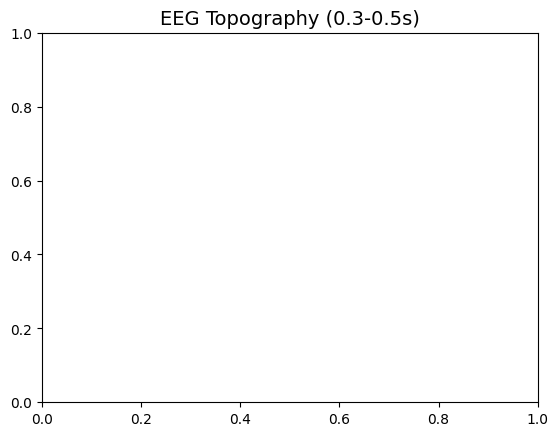

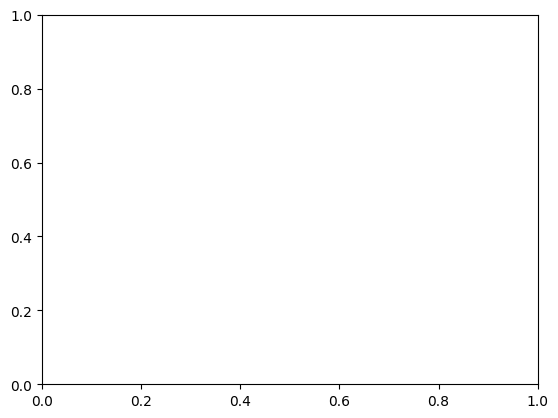

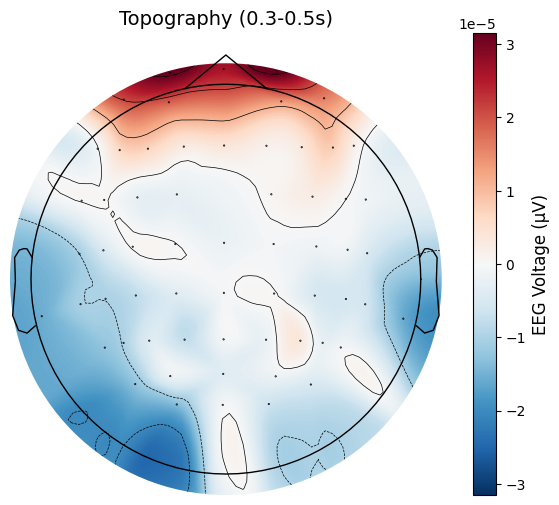

In [22]:
fig, ax = plt.subplots(figsize=(8, 6))
im, _ = mne.viz.plot_topomap(
    data,
    raw.info,
    ch_type='eeg',
    axes=ax,
    show=False,  # Prevent immediate display
    contours=6,
    cmap='RdBu_r',  # Blue-to-red colormap
    extrapolate='head'
)

# Add a colorbar to the figure
cbar = fig.colorbar(im, ax=ax)
cbar.set_label('EEG Voltage (µV)', fontsize=12)  # Label for the colorbar

# Add a title and display the plot
plt.title(f'Topography ({tmin}-{tmax}s)', fontsize=14)
plt.show()